## Лабораторная работа №3

**Кириллов Денис, ИУ5-22М**

### Задание (От преподавателя, не из методички)

Нарисовать нетривиальную ациклическую схему с параллельными и последовательными соединениями. Вероятность отказа каждого из компонентов выражается экспоненциальным законом.

Посчитать по методу Монте-Карло надежность всей системы. Что-то через матрицы смежности. Считать, что система отказала, если матрица возведенная в 10-ую степень, ... что путь ... равен 0.

Найти среднее время наработки на отказ всей системы. Система отказывает, если нет пути из начальной вершины №1 в конечную вершину №7. Достижимость вершины 7 из вершины 1 можно посчитать, возводя матрицу смежности в степень числа шагов.

lambda = 1 для всех компонентов.

### Ход работы

<img src="./схемы/Схема лаб-3.png"/>

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [34]:
# Число прогонов = число экспериментов, где вся система доводится до отказа
NUM_RUNS = 10000

In [35]:
# 8x8
SMEJNOST = np.array([
  #0  1  2  3  4  5  6  выход
  [0, 1, 0, 0, 0, 0, 0, 0], # вход
  [0, 0, 1, 0, 1, 0, 1, 0], # 1
  [0, 0, 0, 1, 0, 0, 0, 0], # 2
  [0, 0, 0, 0, 0, 0, 0, 1], # 3
  [0, 0, 0, 0, 0, 1, 0, 0], # 4
  [0, 0, 0, 0, 0, 0, 0, 1], # 5
  [0, 0, 0, 0, 0, 0, 0, 1], # 6
  [0, 0, 0, 0, 0, 0, 0, 0], # выход
])

# 4 - максимальное число шагов, чтобы пройти из 0 в 7 
MAX_WIDTH = 4
SMEJNOST_SIZE = SMEJNOST.shape[0]

SMEJNOST.shape

(8, 8)

Пытаемся понять, что такое отказ компонента

#### Первый способ

Вот так на заданном интервале проводить эксперимент на отказ каждого из 6 компонентов

In [36]:
TIME_LIMIT = 100
dots = np.random.exponential(size=TIME_LIMIT)
dots.sort()

def normalize(arr, t_min, t_max):
  diff = (t_max - t_min)
  return (arr - t_min) / diff

dots = normalize(dots, dots[0], dots[-1])
# dots
# 1 - работает
# 0 - отказ
denies = dots < 0.5

def get_deny_time(arr):
  return np.where(arr == 0)[0]

t_deny = (get_deny_time(denies))[0]
print(t_deny) # Эту ебалистику можно было просто генерировать через t_deny = np.random.exponential() - намного проще! Так и сделаем

83


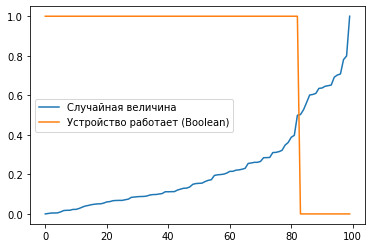

In [37]:
plt.plot(np.arange(0, TIME_LIMIT), dots)
plt.xlabel = 'Время'
plt.ylabel = 'Случайное значение'
plt.plot(np.arange(0, TIME_LIMIT), denies)
plt.legend(['Случайная величина', 'Устройство работает (Boolean)'])

## Второс способ

t_deny = np.random.exponential() - намного проще!

In [38]:
# Потыкать с логами на 1 прогоне

# t_denies = np.random.exponential(size=6) # lambda = 1 для всех компонентов

# t_denies = np.random.exponential(size=(SMEJNOST_SIZE - 2)) # lambda = 1 для всех компонентов # Тут можно было заранее сгенерировать (SMEJNOST_SIZE - 2) х NUM_RUNS чисел
# # Сортировка в порядке наступления отказов у компонентов
# # map: нулевой компонент (вход) и последний компонент (выход) отказать не могут. индексы 0, 1, ... переводим в 1, 2, ...
# t_denies = [*map(lambda x: (x[0] + 1, x[1]), enumerate(t_denies))]
# t_denies

# smejnost = copy.deepcopy(SMEJNOST)

# # 0 - система отказала
# # 1 - система работает
# def test_denial(smejnost):
#   dostijimost = np.linalg.matrix_power(smejnost, MAX_WIDTH)
#   # убираем не единицы (не обязательно)
#   # dostijimost = (dostijimost > 0).astype(int)
#   print('Матрица достижимости теперь:')
#   print(dostijimost)
#   return dostijimost[0][SMEJNOST_SIZE - 1]

# for component_idx, t_deny in t_denies:
#   smejnost[component_idx] = [0] * SMEJNOST_SIZE
#   print(f'Время {t_deny}. Сломался компонент №{component_idx + 1}. Матрица смежности теперь:')
#   print(smejnost)
#   works = test_denial(smejnost)
#   print(f'Конечное состояние {"" if works else "не"}достижимо')
#   print('-'*30, '\n')

In [39]:
# # 0 - система отказала
# # 1 - система работает
def test_denial(smejnost):
  dostijimost = np.linalg.matrix_power(smejnost, MAX_WIDTH)
  return dostijimost[0][SMEJNOST_SIZE - 1]


# Возвращает время наработки наотказ для всей системы
def test_system():
  smejnost = copy.deepcopy(SMEJNOST)

  t_denies = np.random.exponential(size=(SMEJNOST_SIZE - 2)) # lambda = 1 для всех компонентов # Тут можно было заранее сгенерировать (SMEJNOST_SIZE - 2) х NUM_RUNS чисел
  # Сортировка в порядке наступления отказов у компонентов
  # map: нулевой компонент (вход) и последний компонент (выход) отказать не могут. индексы 0, 1, ... переводим в 1, 2, ...
  t_denies = [*map(lambda x: (x[0] + 1, x[1]), enumerate(t_denies))]

  for component_idx, t_deny in t_denies:
    smejnost[component_idx] = [0] * SMEJNOST_SIZE
    works = test_denial(smejnost)
    if not works:
      return t_deny



In [40]:
system_denies_times = np.empty(NUM_RUNS)
for i in range(1, NUM_RUNS):
  system_denies_times[i] = test_system()

# Вроде должны получать lambda, т.е. 1
print(f'Среднее время наработки на отказ {np.mean(system_denies_times):.3f} месяцев (допустим, это месяцы)')

Среднее время наработки на отказ 1.002 месяцев (допустим, это месяцы)
